In [63]:
import sys
sys.path.append('..')
from Constants import Constants

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import re

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

import seaborn
import pyperclip
import os

import scipy.stats

import seaborn as sns

In [65]:
pd.set_option('display.max_columns', 50)

In [66]:
pathes = glob.glob(f"{Constants.path_to_matlab_repository_folder}/csv/*_*/HRV_and_PLI.csv")
pathes.sort()
pathes

['/Users/miyakooti/repositories/arai_MATLAB_program/csv/0_kumakura/HRV_and_PLI.csv',
 '/Users/miyakooti/repositories/arai_MATLAB_program/csv/10_tenshin/HRV_and_PLI.csv',
 '/Users/miyakooti/repositories/arai_MATLAB_program/csv/11_masanori/HRV_and_PLI.csv',
 '/Users/miyakooti/repositories/arai_MATLAB_program/csv/12_enoki/HRV_and_PLI.csv',
 '/Users/miyakooti/repositories/arai_MATLAB_program/csv/13_ito/HRV_and_PLI.csv',
 '/Users/miyakooti/repositories/arai_MATLAB_program/csv/14_yoshioka/HRV_and_PLI.csv',
 '/Users/miyakooti/repositories/arai_MATLAB_program/csv/15_chizuru/HRV_and_PLI.csv',
 '/Users/miyakooti/repositories/arai_MATLAB_program/csv/1_kim/HRV_and_PLI.csv',
 '/Users/miyakooti/repositories/arai_MATLAB_program/csv/2_souma/HRV_and_PLI.csv',
 '/Users/miyakooti/repositories/arai_MATLAB_program/csv/3_fujii/HRV_and_PLI.csv',
 '/Users/miyakooti/repositories/arai_MATLAB_program/csv/4_tubota/HRV_and_PLI.csv',
 '/Users/miyakooti/repositories/arai_MATLAB_program/csv/5_toki/HRV_and_PLI.csv',
 

In [67]:
# 使用するデータセットは一つなので，ここでまとめて作っちゃいましょう

for i,target_phase in enumerate(Constants.target_phases):
    
    for j,path in enumerate(pathes):

        df = pd.read_csv(path,index_col=0).fillna(0)
        # column
        # row
        df = df.loc[[target_phase]] # seriesとして取り出したいときはこっち
        if j == 0 and i == 0:
            print("flow_dataset初期化")
            dataset = df
        else:
            dataset = pd.concat([dataset, df], axis=0)
        
dataset

flow_dataset初期化


,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,s,sd1/sd2,breathingrate,vlf,lf,hf,lf/hf,p_total,vlf_perc,lf_perc,hf_perc,lf_nu,hf_nu,lf_diff,hf_diff,lfhf_diff,kubios_lf,kubios_hf,kubios_lf/hf,FpZ,FC3,FC4,FCz,O1,O2,Fp2,mean_all,mean_3ch,concentration_FC3,concentration_FC4,concentration_FCz,concentration_mean,difficulty,fast,fulfillment,absorb,questionnaire_average
rest,74.087015,809.858521,41.250305,20.146486,36.787621,0.619355,0.183871,30.0,26.012686,52.268898,4271.480335,0.497670,0.300000,396.011131,338.306267,533.157937,0.634533,1267.475336,31.244090,26.691349,42.064561,38.820443,61.179557,0.000000,0.000000,0.000000,257.0,510.0,0.500,0.470375,0.718243,0.530592,0.783054,0.352428,0.286579,0.390179,0.504493,0.677296,0.000000,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.00
rest,84.110828,713.344538,35.699439,17.214344,27.709366,0.432584,0.067416,22.0,19.593268,46.540635,2864.765352,0.420993,0.133333,267.138630,631.637193,212.740305,2.969053,1111.516129,24.033716,56.826633,19.139651,74.805072,25.194928,0.000000,0.000000,0.000000,591.0,219.0,2.700,0.422667,0.593262,0.690615,0.725889,0.310892,0.438972,0.430201,0.516071,0.669922,0.000000,0.000000,0.000000,0.000000,\t\t\t\t,0.0,0.0,0.0,0.00
rest,75.220071,797.659443,40.900640,13.923616,22.012701,0.304348,0.021739,20.0,15.564184,55.685590,2722.820846,0.279501,0.133333,316.777455,1231.720452,138.655648,8.883305,1687.153555,18.775852,73.005830,8.218318,89.881927,10.118073,0.000000,0.000000,0.000000,1044.0,133.0,7.863,0.367564,0.525578,0.305216,0.487435,0.320239,0.311307,0.395218,0.387508,0.439410,0.000000,0.000000,0.000000,0.000000,\t\t\t\t,0.0,0.0,0.0,0.00
rest,69.352315,865.147766,97.031908,17.478813,31.990300,0.593103,0.103448,68.0,22.620469,135.393695,9621.658211,0.167072,0.100000,6128.267686,3421.219463,63.168555,54.160166,9612.655704,63.752077,35.590783,0.657139,98.187098,1.812902,0.000000,0.000000,0.000000,3530.0,90.0,39.337,0.413260,0.519220,0.549392,0.696971,0.218319,0.247750,0.270101,0.416431,0.588528,0.000000,0.000000,0.000000,0.000000,\t\t\t\t,0.0,0.0,0.0,0.00
rest,75.038981,799.584416,82.250228,34.261413,49.297373,0.567657,0.231023,47.0,34.849896,109.839201,12025.654369,0.317281,0.133333,4390.708426,2147.469055,1332.822690,1.611219,7871.000171,55.783361,27.283306,16.933333,61.703708,38.296292,0.000000,0.000000,0.000000,2373.0,2504.0,0.948,0.254564,0.437716,0.493796,0.484021,0.533929,0.538550,0.234585,0.425309,0.471844,0.000000,0.000000,0.000000,0.000000,\t\t\t\t,0.0,0.0,0.0,0.00
rest,77.013055,779.088685,39.542198,14.586589,26.734780,0.484663,0.033742,28.0,18.903769,52.596740,3123.612142,0.359410,0.233333,760.024674,324.690340,340.109566,0.954664,1424.824581,53.341631,22.788092,23.870276,48.840311,51.159689,0.000000,0.000000,0.000000,327.0,379.0,0.861,0.343346,0.171872,0.419099,0.553422,0.191685,0.212534,0.198741,0.298671,0.381464,0.000000,0.000000,0.000000,0.000000,\t\t\t\t,0.0,0.0,0.0,0.00
rest,74.176804,808.878205,30.110234,11.137601,19.383731,0.277419,0.019355,15.0,13.705729,40.351278,1737.437985,0.339660,0.133333,229.517331,282.845325,150.704932,1.876815,663.067587,34.614470,42.657088,22.728442,65.239340,34.760660,0.000000,0.000000,0.000000,212.0,146.0,1.448,0.459175,0.295876,0.565212,0.703698,0.205356,0.246868,0.291289,0.395353,0.521595,0.000000,0.000000,0.000000,0.000000,\t\t\t\t,0.0,0.0,0.0,0.00
rest,73.292489,818.637771,46.744964,17.953896,30.466966,0.500000,0.090062,28.0,21.542646,62.521983,4231.376378,0.344561,0.133333,801.266688,819.546700,315.134442,2.600626,1935.947831,41.388857,42.333098,16.278044,72.227049,27.772951,0.000000,0.000000,0.000000,883.0,301.0,2.937,0.395495,0.652412,0.738686,0.764774,0.222967,0.249696,0.302828,0.475265,0.718624,0.000000,0.000000,0.000000,0.000000,\t\t\t\t,0.0,0.0,0.0,0.00
rest,52.498950,1142.880000,87.693551,53.126065,101.641088,0.870536,0.727679,66.0,71.870929,100.674178,22731.140401,0.713896,0.233333,1450.919208,401.670418,4529.935860,0.088670,6382.525486,22.732682,6.293283,70.974035,8.144819,91.855181,0.000000,0.000000,0.000

In [68]:
target = "kubios_lf"

In [69]:
mkdir_path = f"{Constants.path_to_matlab_repository_folder}/csv/analysis_results/{Constants.folder_name}"

os.system("mkdir " + mkdir_path)
os.system("mkdir " + mkdir_path + "/ANOVA")

mkdir: /Users/miyakooti/repositories/arai_MATLAB_program/csv/analysis_results/20240627_kyoto: File exists
mkdir: /Users/miyakooti/repositories/arai_MATLAB_program/csv/analysis_results/20240627_kyoto/ANOVA: File exists


256

In [70]:
target_columns = Constants.target_columns
skip_columns = ["lf_diff", "hf_diff", "lfhf_diff", "concentration_FC3", "concentration_FC4", "concentration_FCz", "concentration_mean", "difficulty", "fast", "fulfillment", "absorb", "questionnaire_average"]

In [71]:

    
rest = dataset[[target]].loc["rest"]
rest.reset_index(drop=True, inplace=True)

boredom = dataset[[target]].loc["boredom"]
boredom.reset_index(drop=True, inplace=True)

flow = dataset[[target]].loc["flow"]
flow.reset_index(drop=True, inplace=True)

ultra = dataset[[target]].loc["ultra"]
ultra.reset_index(drop=True, inplace=True)

overload = dataset[[target]].loc["overload"]
overload.reset_index(drop=True, inplace=True)

combined_data = pd.concat([
    rest.assign(state='rest'),
    boredom.assign(state='boredom'),
    flow.assign(state='flow'),
    ultra.assign(state='ultra'),
    overload.assign(state='overload')
])

In [72]:
combined_data

,kubios_lf,state
0,257.0,rest
1,591.0,rest
2,1044.0,rest
3,3530.0,rest
4,2373.0,rest
5,327.0,rest
6,212.0,rest
7,883.0,rest
8,490.0,rest
9,212.0,rest


In [73]:
target = "lf"

In [74]:
rest = dataset[[target]].loc["rest"]
rest.reset_index(drop=True, inplace=True)

In [75]:
boredom = dataset[[target]].loc["boredom"]
boredom.reset_index(drop=True, inplace=True)

In [76]:
flow = dataset[[target]].loc["flow"]
flow.reset_index(drop=True, inplace=True)

In [77]:
ultra = dataset[[target]].loc["ultra"]
ultra.reset_index(drop=True, inplace=True)

In [78]:
overload = dataset[[target]].loc["overload"]
overload.reset_index(drop=True, inplace=True)

In [79]:
combined_data = pd.concat([
    rest.assign(state='rest'),
    boredom.assign(state='boredom'),
    flow.assign(state='flow'),
    ultra.assign(state='ultra'),
    overload.assign(state='overload')
])

In [88]:
colors = {'rest': 'gray', 'boredom': 'orange', 'flow': 'yellow', 'ultra': 'gray', 'overload': 'gray'}


<AxesSubplot:xlabel='state', ylabel='lf'>

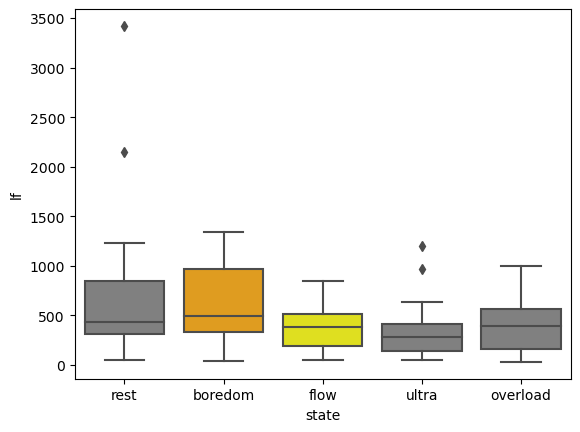

In [89]:
plt.clf()
boxplot = sns.boxplot(x="state", y=f"{target}", data=combined_data, palette=colors)
boxplot

In [90]:
combined_data = combined_data.melt(id_vars=['state'], var_name='category', value_name='lf')


/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40126/383951052.py:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  combined_data = combined_data.melt(id_vars=['state'], var_name='category', value_name='lf')


<AxesSubplot:xlabel='state', ylabel='lf'>

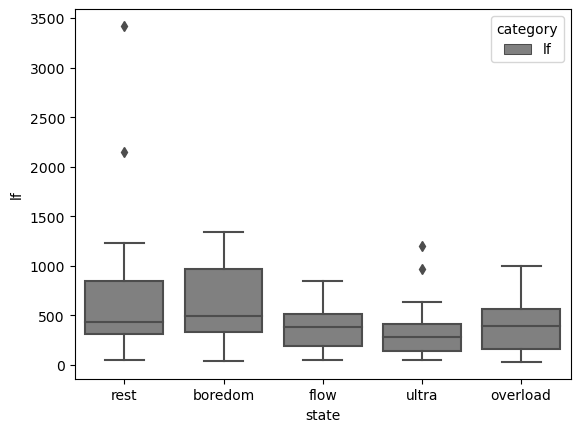

In [84]:
sns.boxplot(x='state', y='lf', hue='category', palette=['gray', 'yellow'], data=combined_data)


In [2]:
import sys
sys.path.append('..')
from Constants import Constants

In [25]:
figure = boxplot.get_figure()
figure.savefig(mkdir_path+f"/ANOVA/{target}.png")

In [26]:
from statsmodels.stats.anova import anova_lm

import numpy as np
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [27]:
# 一次元配置の分散分析モデルを作成
model = ols(f'{target} ~ state', data=combined_data).fit()

# 分散分析結果を取得
anova_result = anova_lm(model)

# 結果を表示
print(anova_result)

            df        sum_sq        mean_sq         F    PR(>F)
state      4.0  2.181660e+06  545415.013531  2.288964  0.067606
Residual  75.0  1.787103e+07  238280.333452       NaN       NaN


In [28]:
# 事後検定の実施
tukey = pairwise_tukeyhsd(endog=combined_data[target], groups=combined_data['state'], alpha=0.10)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
boredom,flow,-261.7103,0.5552,-694.321,170.9003,False
boredom,overload,-201.7711,0.7688,-634.3817,230.8396,False
boredom,rest,151.4859,0.9042,-281.1247,584.0966,False
boredom,ultra,-266.8679,0.5361,-699.4785,165.7428,False
flow,overload,59.9392,0.9968,-372.6714,492.5499,False
flow,rest,413.1963,0.1282,-19.4144,845.8069,False
flow,ultra,-5.1575,1.0,-437.7682,427.4531,False
overload,rest,353.257,0.2543,-79.3536,785.8677,False
overload,ultra,-65.0968,0.9956,-497.7074,367.5139,False
rest,ultra,-418.3538,0.1202,-850.9644,14.2569,False


In [29]:
# Save the string to a text file
file_path = mkdir_path+f"/ANOVA/{target}.txt"
with open(file_path, 'w') as file:
    file.write(tukey.summary().as_text())

# LFとPLIの相関調査

In [54]:
target = "lf"

In [55]:
pd.set_option('display.max_rows', 500)


In [56]:
dataset

,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,s,sd1/sd2,breathingrate,vlf,lf,hf,lf/hf,p_total,vlf_perc,lf_perc,hf_perc,lf_nu,hf_nu,lf_diff,hf_diff,lfhf_diff,kubios_lf,kubios_hf,kubios_lf/hf,FpZ,FC3,FC4,FCz,O1,O2,Fp2,mean_all,mean_3ch,concentration_FC3,concentration_FC4,concentration_FCz,concentration_mean,difficulty,fast,fulfillment,absorb,questionnaire_average
rest,74.087015,809.858521,41.250305,20.146486,36.787621,0.619355,0.183871,30.0,26.012686,52.268898,4271.480335,0.497670,0.300000,396.011131,338.306267,533.157937,0.634533,1267.475336,31.244090,26.691349,42.064561,38.820443,61.179557,0.000000,0.000000,0.000000,257.0,510.0,0.500,0.470375,0.718243,0.530592,0.783054,0.352428,0.286579,0.390179,0.504493,0.677296,0.000000,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.00
rest,84.110828,713.344538,35.699439,17.214344,27.709366,0.432584,0.067416,22.0,19.593268,46.540635,2864.765352,0.420993,0.133333,267.138630,631.637193,212.740305,2.969053,1111.516129,24.033716,56.826633,19.139651,74.805072,25.194928,0.000000,0.000000,0.000000,591.0,219.0,2.700,0.422667,0.593262,0.690615,0.725889,0.310892,0.438972,0.430201,0.516071,0.669922,0.000000,0.000000,0.000000,0.000000,\t\t\t\t,0.0,0.0,0.0,0.00
rest,75.220071,797.659443,40.900640,13.923616,22.012701,0.304348,0.021739,20.0,15.564184,55.685590,2722.820846,0.279501,0.133333,316.777455,1231.720452,138.655648,8.883305,1687.153555,18.775852,73.005830,8.218318,89.881927,10.118073,0.000000,0.000000,0.000000,1044.0,133.0,7.863,0.367564,0.525578,0.305216,0.487435,0.320239,0.311307,0.395218,0.387508,0.439410,0.000000,0.000000,0.000000,0.000000,\t\t\t\t,0.0,0.0,0.0,0.00
rest,69.352315,865.147766,97.031908,17.478813,31.990300,0.593103,0.103448,68.0,22.620469,135.393695,9621.658211,0.167072,0.100000,6128.267686,3421.219463,63.168555,54.160166,9612.655704,63.752077,35.590783,0.657139,98.187098,1.812902,0.000000,0.000000,0.000000,3530.0,90.0,39.337,0.413260,0.519220,0.549392,0.696971,0.218319,0.247750,0.270101,0.416431,0.588528,0.000000,0.000000,0.000000,0.000000,\t\t\t\t,0.0,0.0,0.0,0.00
rest,75.038981,799.584416,82.250228,34.261413,49.297373,0.567657,0.231023,47.0,34.849896,109.839201,12025.654369,0.317281,0.133333,4390.708426,2147.469055,1332.822690,1.611219,7871.000171,55.783361,27.283306,16.933333,61.703708,38.296292,0.000000,0.000000,0.000000,2373.0,2504.0,0.948,0.254564,0.437716,0.493796,0.484021,0.533929,0.538550,0.234585,0.425309,0.471844,0.000000,0.000000,0.000000,0.000000,\t\t\t\t,0.0,0.0,0.0,0.00
rest,77.013055,779.088685,39.542198,14.586589,26.734780,0.484663,0.033742,28.0,18.903769,52.596740,3123.612142,0.359410,0.233333,760.024674,324.690340,340.109566,0.954664,1424.824581,53.341631,22.788092,23.870276,48.840311,51.159689,0.000000,0.000000,0.000000,327.0,379.0,0.861,0.343346,0.171872,0.419099,0.553422,0.191685,0.212534,0.198741,0.298671,0.381464,0.000000,0.000000,0.000000,0.000000,\t\t\t\t,0.0,0.0,0.0,0.00
rest,74.176804,808.878205,30.110234,11.137601,19.383731,0.277419,0.019355,15.0,13.705729,40.351278,1737.437985,0.339660,0.133333,229.517331,282.845325,150.704932,1.876815,663.067587,34.614470,42.657088,22.728442,65.239340,34.760660,0.000000,0.000000,0.000000,212.0,146.0,1.448,0.459175,0.295876,0.565212,0.703698,0.205356,0.246868,0.291289,0.395353,0.521595,0.000000,0.000000,0.000000,0.000000,\t\t\t\t,0.0,0.0,0.0,0.00
rest,73.292489,818.637771,46.744964,17.953896,30.466966,0.500000,0.090062,28.0,21.542646,62.521983,4231.376378,0.344561,0.133333,801.266688,819.546700,315.134442,2.600626,1935.947831,41.388857,42.333098,16.278044,72.227049,27.772951,0.000000,0.000000,0.000000,883.0,301.0,2.937,0.395495,0.652412,0.738686,0.764774,0.222967,0.249696,0.302828,0.475265,0.718624,0.000000,0.000000,0.000000,0.000000,\t\t\t\t,0.0,0.0,0.0,0.00
rest,52.498950,1142.880000,87.693551,53.126065,101.641088,0.870536,0.727679,66.0,71.870929,100.674178,22731.140401,0.713896,0.233333,1450.919208,401.670418,4529.935860,0.088670,6382.525486,22.732682,6.293283,70.974035,8.144819,91.855181,0.000000,0.000000,0.000

In [57]:
rest = dataset.loc["rest"]
boredom = dataset.loc["boredom"]
flow = dataset.loc["flow"]
ultra = dataset.loc["ultra"]
overload = dataset.loc["overload"]

boredom

,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,s,sd1/sd2,breathingrate,vlf,lf,hf,lf/hf,p_total,vlf_perc,lf_perc,hf_perc,lf_nu,hf_nu,lf_diff,hf_diff,lfhf_diff,kubios_lf,kubios_hf,kubios_lf/hf,FpZ,FC3,FC4,FCz,O1,O2,Fp2,mean_all,mean_3ch,concentration_FC3,concentration_FC4,concentration_FCz,concentration_mean,difficulty,fast,fulfillment,absorb,questionnaire_average
boredom,76.136223,788.061162,38.553302,16.680887,31.258471,0.582822,0.092025,22.0,22.103056,49.826426,3459.887136,0.443601,0.366667,518.685695,348.261920,297.243050,1.171640,1164.190666,44.553329,29.914509,25.532162,53.951857,46.048143,-9.955653,235.914887,-0.537107,318.0,315.0,1.000,0.276021,0.446082,0.437729,0.560950,0.180391,0.162976,0.240775,0.280706,0.481587,0.272161,0.092863,0.222104,0.195709,2,2.0,5.0,2.0,2.75
boredom,89.866583,667.656410,35.993944,17.595896,28.445049,0.455013,0.082262,26.0,20.113482,46.694019,2950.518808,0.430751,0.133333,95.834405,495.812750,206.007992,2.406765,797.655147,12.014516,62.158785,25.826699,70.646637,29.353363,135.824443,6.732313,0.562288,604.0,229.0,2.639,0.448846,0.607136,0.642968,0.732918,0.286166,0.396024,0.466052,0.328706,0.661008,-0.013875,0.047647,-0.007030,0.008914,3,2.0,4.0,2.0,2.75
boredom,71.332969,841.125786,39.674817,15.344297,24.405099,0.381703,0.037855,21.0,17.255790,53.203177,2884.179566,0.324338,0.133333,276.027700,830.045789,211.114474,3.931733,1317.187963,20.955832,63.016503,16.027665,79.723153,20.276847,401.674663,-72.458826,4.951572,963.0,202.0,4.770,0.348395,0.550590,0.565329,0.610800,0.308010,0.451657,0.362960,0.241190,0.575573,-0.025012,-0.260113,-0.123365,-0.136163,1,1.0,2.0,1.0,1.25
boredom,75.624166,793.397183,64.018021,14.330553,23.595940,0.375706,0.022599,48.0,16.682086,88.931149,4660.732070,0.187584,0.133333,1331.578706,943.801523,254.256193,3.712010,2529.636423,52.639134,37.309770,10.051096,78.777634,21.222366,2477.417940,-191.087638,50.448156,890.0,242.0,3.680,0.358975,0.495150,0.549294,0.599081,0.207888,0.253009,0.326009,0.268377,0.547842,0.024070,0.000098,0.097890,0.040686,2,1.0,4.0,5.0,3.00
boredom,70.883852,846.455128,70.737402,33.684115,56.505324,0.735484,0.374194,46.0,39.953793,91.469209,11481.081828,0.436800,0.266667,922.164708,1340.583788,1206.108766,1.111495,3468.857261,26.584106,38.646266,34.769628,52.640190,47.359810,806.885267,126.713925,0.499724,1939.0,1974.0,0.982,0.381545,0.618994,0.686718,0.722451,0.375563,0.380402,0.303913,0.241159,0.676054,-0.181278,-0.192921,-0.238430,-0.204210,1,3.0,4.0,4.0,3.00
boredom,75.232198,797.530864,32.813760,14.825211,27.674356,0.517028,0.040248,23.0,19.568693,42.149279,2591.205430,0.464271,0.233333,323.129952,179.164555,458.042924,0.391152,960.337432,33.647543,18.656417,47.696040,28.117146,71.882854,145.525785,-117.933359,0.563512,206.0,494.0,0.418,0.274297,0.312096,0.415012,0.637438,0.128878,0.155111,0.297436,0.175157,0.454849,-0.140224,0.004087,-0.084016,-0.073384,1,3.0,2.0,2.0,2.00
boredom,75.898345,790.531073,32.063679,10.475852,17.517292,0.206799,0.002833,15.0,12.386386,43.654206,1698.715233,0.283739,0.266667,412.214017,484.643542,147.459435,3.286623,1044.316995,39.472116,46.407704,14.120180,76.671612,23.328388,-201.798218,3.245497,-1.409807,385.0,223.0,1.721,0.313061,0.346950,0.437815,0.602253,0.197531,0.168402,0.216386,0.229038,0.462339,-0.051074,0.127397,0.101445,0.059256,7,3.0,7.0,6.0,5.75
boredom,71.423666,840.057692,42.155807,16.301138,27.205778,0.469453,0.061093,26.0,19.236998,56.112556,3391.151743,0.342829,0.100000,798.231166,497.917771,119.059764,4.182083,1415.208701,56.403777,35.183346,8.412877,80.702739,19.297261,321.628930,196.074678,-1.581457,481.0,133.0,3.627,0.433278,0.594007,0.755913,0.809629,0.135446,0.195780,0.268044,0.289745,0.719850,0.058405,-0.017227,-0.044855,-0.001225,1,1.0,2.0,2.0,1.50
boredom,53.624953,1118.882096,94.086874,48.786442,91.436106,0.846491,0.675439,60.0,64.654157,116.445896,23652.143989,0.555229,0.300000,1115.907755,1032.088589,2584.766631,0.399297,4732.762974,23.578357,21.807316,54.614327,28.535524,71.46447

In [58]:
new_data = pd.concat([
#     rest.assign(state='rest'),
    boredom.assign(state='boredom'),
    flow.assign(state='flow'),
#     ultra.assign(state='ultra'),
    overload.assign(state='overload')
])

In [59]:
new_data

,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,s,sd1/sd2,breathingrate,vlf,lf,hf,lf/hf,p_total,vlf_perc,lf_perc,hf_perc,lf_nu,hf_nu,lf_diff,hf_diff,lfhf_diff,kubios_lf,kubios_hf,kubios_lf/hf,FpZ,FC3,FC4,FCz,O1,O2,Fp2,mean_all,mean_3ch,concentration_FC3,concentration_FC4,concentration_FCz,concentration_mean,difficulty,fast,fulfillment,absorb,questionnaire_average,state
boredom,76.136223,788.061162,38.553302,16.680887,31.258471,0.582822,0.092025,22.0,22.103056,49.826426,3459.887136,0.443601,0.366667,518.685695,348.261920,297.243050,1.171640,1164.190666,44.553329,29.914509,25.532162,53.951857,46.048143,-9.955653,235.914887,-0.537107,318.0,315.0,1.000,0.276021,0.446082,0.437729,0.560950,0.180391,0.162976,0.240775,0.280706,0.481587,0.272161,0.092863,0.222104,0.195709,2,2.0,5.0,2.0,2.75,boredom
boredom,89.866583,667.656410,35.993944,17.595896,28.445049,0.455013,0.082262,26.0,20.113482,46.694019,2950.518808,0.430751,0.133333,95.834405,495.812750,206.007992,2.406765,797.655147,12.014516,62.158785,25.826699,70.646637,29.353363,135.824443,6.732313,0.562288,604.0,229.0,2.639,0.448846,0.607136,0.642968,0.732918,0.286166,0.396024,0.466052,0.328706,0.661008,-0.013875,0.047647,-0.007030,0.008914,3,2.0,4.0,2.0,2.75,boredom
boredom,71.332969,841.125786,39.674817,15.344297,24.405099,0.381703,0.037855,21.0,17.255790,53.203177,2884.179566,0.324338,0.133333,276.027700,830.045789,211.114474,3.931733,1317.187963,20.955832,63.016503,16.027665,79.723153,20.276847,401.674663,-72.458826,4.951572,963.0,202.0,4.770,0.348395,0.550590,0.565329,0.610800,0.308010,0.451657,0.362960,0.241190,0.575573,-0.025012,-0.260113,-0.123365,-0.136163,1,1.0,2.0,1.0,1.25,boredom
boredom,75.624166,793.397183,64.018021,14.330553,23.595940,0.375706,0.022599,48.0,16.682086,88.931149,4660.732070,0.187584,0.133333,1331.578706,943.801523,254.256193,3.712010,2529.636423,52.639134,37.309770,10.051096,78.777634,21.222366,2477.417940,-191.087638,50.448156,890.0,242.0,3.680,0.358975,0.495150,0.549294,0.599081,0.207888,0.253009,0.326009,0.268377,0.547842,0.024070,0.000098,0.097890,0.040686,2,1.0,4.0,5.0,3.00,boredom
boredom,70.883852,846.455128,70.737402,33.684115,56.505324,0.735484,0.374194,46.0,39.953793,91.469209,11481.081828,0.436800,0.266667,922.164708,1340.583788,1206.108766,1.111495,3468.857261,26.584106,38.646266,34.769628,52.640190,47.359810,806.885267,126.713925,0.499724,1939.0,1974.0,0.982,0.381545,0.618994,0.686718,0.722451,0.375563,0.380402,0.303913,0.241159,0.676054,-0.181278,-0.192921,-0.238430,-0.204210,1,3.0,4.0,4.0,3.00,boredom
boredom,75.232198,797.530864,32.813760,14.825211,27.674356,0.517028,0.040248,23.0,19.568693,42.149279,2591.205430,0.464271,0.233333,323.129952,179.164555,458.042924,0.391152,960.337432,33.647543,18.656417,47.696040,28.117146,71.882854,145.525785,-117.933359,0.563512,206.0,494.0,0.418,0.274297,0.312096,0.415012,0.637438,0.128878,0.155111,0.297436,0.175157,0.454849,-0.140224,0.004087,-0.084016,-0.073384,1,3.0,2.0,2.0,2.00,boredom
boredom,75.898345,790.531073,32.063679,10.475852,17.517292,0.206799,0.002833,15.0,12.386386,43.654206,1698.715233,0.283739,0.266667,412.214017,484.643542,147.459435,3.286623,1044.316995,39.472116,46.407704,14.120180,76.671612,23.328388,-201.798218,3.245497,-1.409807,385.0,223.0,1.721,0.313061,0.346950,0.437815,0.602253,0.197531,0.168402,0.216386,0.229038,0.462339,-0.051074,0.127397,0.101445,0.059256,7,3.0,7.0,6.0,5.75,boredom
boredom,71.423666,840.057692,42.155807,16.301138,27.205778,0.469453,0.061093,26.0,19.236998,56.112556,3391.151743,0.342829,0.100000,798.231166,497.917771,119.059764,4.182083,1415.208701,56.403777,35.183346,8.412877,80.702739,19.297261,321.628930,196.074678,-1.581457,481.0,133.0,3.627,0.433278,0.594007,0.755913,0.809629,0.135446,0.195780,0.268044,0.289745,0.719850,0.058405,-0.017227,-0.044855,-0.001225,1,1.0,2.0,2.0,1.50,boredom
boredom,53.624953,1118.882096,94.086874,48.786442,91.436106,0.846491,0.675439,60.0,64.654157,116.445896,23652.143989,0.555229,0.300000,1115.907755,1032.088589,2584.766631

In [60]:
# zスコアを計算して外れ値を検出・削除します
threshold = 3
mean_kubios_lf = np.mean(new_data[target])
std_kubios_lf = np.std(new_data[target])

# zスコアを計算
new_data['z_score'] = (new_data[target] - mean_kubios_lf) / std_kubios_lf

# zスコアがthresholdを超える行を削除
cleaned_data = new_data[new_data['z_score'].abs() <= threshold].drop(columns=['z_score'])


In [61]:
correlation_coefficient = cleaned_data[target].corr(cleaned_data["FCz"])
correlation_coefficient

0.3060616534511646

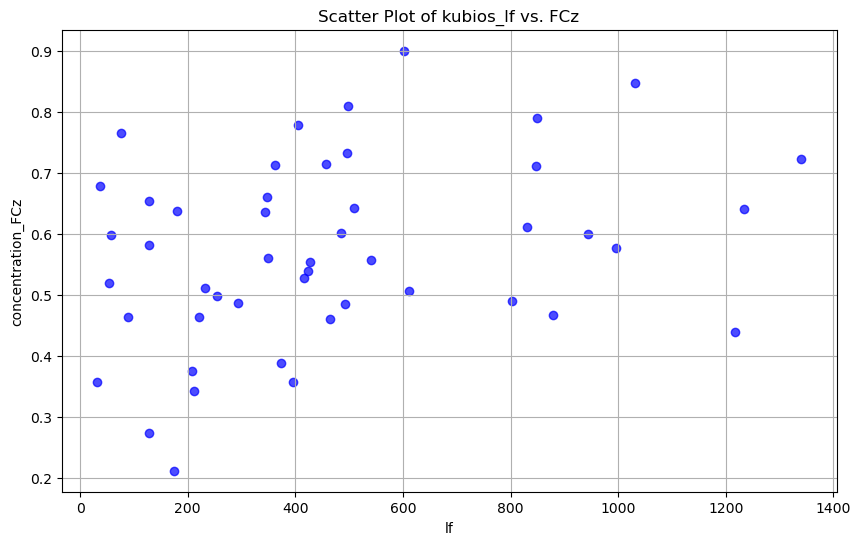

In [62]:
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_data[target], cleaned_data["FCz"], color='blue', alpha=0.7)
plt.title('Scatter Plot of kubios_lf vs. FCz')
plt.xlabel(target)
plt.ylabel('concentration_FCz')
plt.grid(True)

plt.show()